In [5]:
import cv2
from ultralytics import YOLO
import numpy as np
import matplotlib.pyplot as plt

## YOLO moment

In [2]:
model = YOLO("yolov9c.pt")

100%|██████████| 49.4M/49.4M [00:04<00:00, 11.3MB/s]


In [4]:
template_image = cv2.imread('imgs/g1.png')
larger_image = cv2.imread('imgs/f1.png')

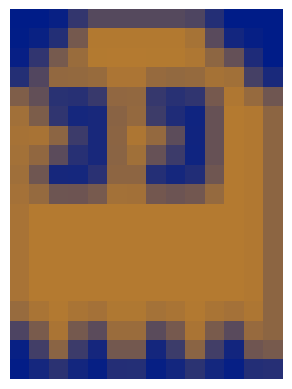

In [7]:
#Show image
plt.imshow(cv2.cvtColor(template_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

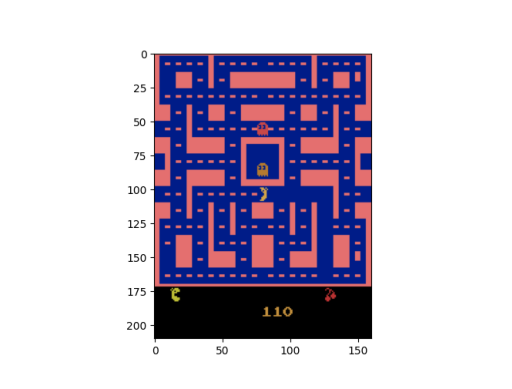

In [8]:
plt.imshow(cv2.cvtColor(larger_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [13]:
def predict_and_detect(chosen_model, img, conf=0.5, rectangle_thickness=2, text_thickness=1):
    results = chosen_model.predict(img, conf=conf)
    for result in results:
        for box in result.boxes:
            cv2.rectangle(img, (int(box.xyxy[0][0]), int(box.xyxy[0][1])),
                          (int(box.xyxy[0][2]), int(box.xyxy[0][3])), (255, 0, 0), rectangle_thickness)
            cv2.putText(img, f"{result.names[int(box.cls[0])]}",
                        (int(box.xyxy[0][0]), int(box.xyxy[0][1]) - 10),
                        cv2.FONT_HERSHEY_PLAIN, 1, (255, 0, 0), text_thickness)
    return img, results

# Apply the function to detect the template in the larger image
result_img, _ = predict_and_detect(model, larger_image, conf=0.9)


0: 480x640 (no detections), 197.5ms
Speed: 1.8ms preprocess, 197.5ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


In [10]:
cv2.imshow("Detected Image", result_img)
cv2.imwrite("DetectedTemplateInImage.jpg", result_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Template Matching

### Grises

In [18]:
# Convertir ambas imágenes a escala de grises
main_gray = cv2.cvtColor(larger_image, cv2.COLOR_BGR2GRAY)
template_gray = cv2.cvtColor(template_image, cv2.COLOR_BGR2GRAY)

# Obtener las dimensiones de la plantilla
w, h = template_gray.shape[::-1]

# Aplicar la técnica de matching de plantillas
res = cv2.matchTemplate(main_gray, template_gray, cv2.TM_CCOEFF_NORMED)

# Establecer un umbral para considerar una coincidencia
threshold = 0.8
loc = np.where(res >= threshold)

# Dibujar rectángulos donde se encuentran las coincidencias
for pt in zip(*loc[::-1]):
    cv2.rectangle(larger_image, pt, (pt[0] + w, pt[1] + h), (0, 255, 0), 2)

# Mostrar la imagen con las coincidencias encontradas
cv2.imshow('Detected', larger_image)
cv2.waitKey(0)
cv2.destroyAllWindows()